In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras import optimizers
np.random.seed(1000)


#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
layer1=Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid')
model.add(layer1)
layer2=Activation('relu')
model.add(layer2)
# Max Pooling
layer3=MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')
model.add(layer3)

# 2nd Convolutional Layer
layer4=Conv2D(filters=256, kernel_size=(5,5), padding='same')
model.add(layer4)
layer5=Activation('relu')
model.add(layer5)
# Max Pooling
layer6=MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')
model.add(layer6)

# 3rd Convolutional Layer
layer7=Conv2D(filters=384, kernel_size=(3,3),  padding='same')
model.add(layer7)
layer8=Activation('relu')
model.add(layer8)

# 4th Convolutional Layer
layer9=Conv2D(filters=384, kernel_size=(3,3), padding='same')
model.add(layer9)
layer10=Activation('relu')
model.add(layer10)

# 5th Convolutional Layer
layer11=Conv2D(filters=256, kernel_size=(3,3), padding='same')
model.add(layer11)
layer12=Activation('relu')
model.add(layer12)
# Max Pooling
#layer13=MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')
#model.add(layer13)

# Passing it to a Fully Connected layer
layer14=Flatten()
model.add(layer14)
# 1st Fully Connected Layer
layer15=Dense(4096)
model.add(layer15)
layer16=Activation('relu')
model.add(layer16)
# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
layer17=Dense(4096)
model.add(layer17)


import tensorflow as tf

layer1.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'conv2d/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'conv2d/bias')])
layer4.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'conv2d_1/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'conv2d_1/bias')])
layer7.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'conv2d_2/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'conv2d_2/bias')])
layer9.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'conv2d_3/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'conv2d_3/bias')])
layer11.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'conv2d_4/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'conv2d_4/bias')])
layer15.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'dense/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'dense/bias')])
layer17.set_weights([tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                            'dense_1/kernel'), 
                    tf.train.load_variable('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/model.ckpt-5000', 
                                           'dense_1/bias')])


model.summary()

# Compile the model
opt = optimizers.SGD(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
                                

Using TensorFlow backend.








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_______________

In [3]:
model.save("/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/an-model.h5")

In [ ]:
## on a single item
from PIL import *
from PIL import Image
import time
from keras.preprocessing import image

start = time.time()


img_path = '/home/ec2-user/SageMaker/imat/test_images/10000.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
#img_data = preprocess_input(img_data)

RN_feature = model.predict(img_data)

print(RN_feature.shape)

end = time.time()

print('\n\ntime spend: ' , (end - start) , ' seconds \n\n')

In [ ]:
import os
import pandas as pd
from keras.preprocessing import image
INV3_feature_dic = {}
INV3_feature_list=[]
directory = '/home/ec2-user/SageMaker/inspo-book/fashionbeans/maskeditems/'
counter=0
onlyfiles = len(next(os.walk(directory))[2])

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        #print(filename)
    
        img = image.load_img('/home/ec2-user/SageMaker/inspo-book/fashionbeans/maskeditems/'+str(filename), target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        #img_data = preprocess_input(img_data)
        INV3_feature = model.predict(img_data)
        INV3_feature_np = np.array(INV3_feature)
        INV3_feature_list.append(INV3_feature_np.flatten())
    
        key=str(filename)

        INV3_feature_dic[key]=INV3_feature_np
    

        #os.rename(directory+'/'+str(filename),directory+'/'+str(filename)+'-ex')
  
        counter+=1

        #print(str(counter)+'of'+str(onlyfiles))
    
INV3_feature_list_np = np.array(INV3_feature_list)

In [ ]:
len(INV3_feature_list_np)

In [ ]:
len(INV3_feature_dic['62+30-masked-7.jpg'][0])

In [ ]:
an_features=pd.DataFrame(INV3_feature_list)
an_features.head()

In [ ]:
###
an_features['names']=list(INV3_feature_dic.keys())
an_features['labels'] =  [str(an_features['names'][i]).split('-')[2].split('.')[0] for i in  range(len(an_features['names']))]
an_features.set_index('names', drop=True, append=False, inplace=True)
an_features.head()

In [ ]:
# load label to names mapping for visualization purposes
labels_to_names = {1: 'bag', 2: 'belt', 3: 'boots', 4: 'footwear', 5: 'outer', 6: 'dress', 7: 'sunglasses', 8: 'pants', 9: 'top', 10: 'shorts', 11: 'skirt', 12: 'headwear', 13: 'scarf/tie'}


In [ ]:
an_features['label names']=[labels_to_names[int(an_features['labels'][i])+1] for i in range(len(an_features['labels']))]
an_features.head()

In [ ]:
%cd '/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx'

In [ ]:
an_features.to_csv('an_features.csv')

In [32]:
import pandas as pd
import random
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
import matplotlib.gridspec as gridspec

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

an_features = pd.read_csv('/home/ec2-user/SageMaker/inspo-book/AlexNetFeEx/an_features.csv', index_col='names')
an_features.head()

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
52+8-masked-6.jpg,1.087226,-0.484380,0.272216,-0.835212,-0.183234,-0.200518,-0.428310,-0.818996,0.210382,0.854008,...,-0.187376,-0.511218,-0.249325,-0.317675,-0.376330,-0.007422,-0.375364,0.488263,6,sunglasses
32+10-masked-11.jpg,0.928401,-0.330847,0.189102,-0.741472,-0.063297,-0.185335,-0.386670,-0.729338,0.290457,0.887799,...,-0.254639,-0.415916,-0.311023,-0.335880,-0.305064,0.034643,-0.355143,0.407063,11,headwear
66+29-masked-8.jpg,2.083967,-0.869367,0.208548,-1.230352,-0.261161,-0.262119,-1.321182,-2.093839,0.204614,0.941877,...,-0.245557,-0.324935,-0.414757,-0.084021,-0.610420,0.073464,-0.271444,1.050277,8,top
27+16-masked-4.jpg,1.040863,-0.419620,0.141599,-0.770629,-0.149726,-0.113578,-0.536292,-0.834782,0.203574,0.846386,...,-0.175253,-0.362498,-0.277386,-0.198199,-0.282528,0.063879,-0.350246,0.506748,4,outer
72+26-masked-4.jpg,1.422419,-0.604403,-0.175863,-1.154203,0.131960,-0.124288,-0.844445,-1.240067,0.017741,0.845139,...,-0.229138,-0.375779,-0.081586,-0.107193,-0.475142,-0.143376,-0.198931,0.798536,4,outer


In [34]:
## Scaling the features 

scaler = preprocessing.StandardScaler()
an_features.loc[:,'0':'4095'] = scaler.fit_transform(an_features.loc[:,'0':'4095'])

In [67]:
sample_df = an_features.loc[an_features['labels'] == 7]
print(sample_df.shape)
sample_df.head()

(2204, 4098)


,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
72+19-masked-7.jpg,-0.819022,0.429000,-0.198451,0.583052,-0.211170,-0.302698,0.841604,0.349397,0.348236,0.128851,...,0.034870,0.129017,-0.080112,0.753524,0.332736,0.792850,0.128146,-0.760902,7,pants
17+12-masked-7.jpg,0.333073,-1.072093,-1.906338,0.065464,-1.901591,-0.321076,-0.479584,-1.026137,0.676382,0.161732,...,0.721334,-0.811962,0.375420,0.945543,-0.069287,1.578767,1.149061,-0.749264,7,pants
34+23-masked-7.jpg,0.106591,-0.704960,-1.435858,-0.618182,-1.076679,-0.644450,-0.394001,-0.717713,0.209392,0.065986,...,0.738030,-0.313862,1.021733,-0.373467,-0.994112,-0.253232,-0.290192,-0.703329,7,pants
50+6-masked-7.jpg,-0.255893,0.784655,-0.845836,-0.299947,-1.317373,-0.012123,-0.197271,-0.710444,-0.014046,0.042598,...,0.377421,-1.246535,0.944806,-1.021980,-1.297974,0.758959,0.962833,-0.278366,7,pants
46+30-masked-7.jpg,0.258016,-0.557161,-1.084238,0.380193,-0.773035,0.883391,-0.251894,-0.601973,0.058852,0.478208,...,-1.215781,-0.255956,-1.766234,-1.001722,-0.302540,-0.503595,1.468086,0.703637,7,pants


In [68]:
cos_val = sample_df.iloc[:, :4095].dot(sample_df.iloc[:, :4095].T)
cos_val.head()

names,72+19-masked-7.jpg,17+12-masked-7.jpg,34+23-masked-7.jpg,50+6-masked-7.jpg,46+30-masked-7.jpg,20+22-masked-7.jpg,19+9-masked-7.jpg,11+27-masked-7.jpg,72+13-masked-7.jpg,69+19-masked-7.jpg,...,52+21-masked-7.jpg,71+24-masked-7.jpg,53+4-masked-7.jpg,34+22-masked-7.jpg,62+27-masked-7.jpg,13+5-masked-7.jpg,61+7-masked-7.jpg,44+7-masked-7.jpg,69+5-masked-7.jpg,62+30-masked-7.jpg
names,,,,,,,,,,,,,,,,,,,,,
72+19-masked-7.jpg,1250.501561,-241.576238,13.505933,247.862421,-496.204873,850.145108,743.097943,795.655470,623.238126,-516.214442,...,-29.644238,-1106.101256,696.647310,985.006677,164.157201,943.377392,669.463043,-59.754800,-2982.398948,693.066181
17+12-masked-7.jpg,-241.576238,3448.485527,1474.082255,949.257924,1169.321347,-228.169355,236.227839,67.648038,50.021229,1999.541274,...,1654.291328,2952.793350,272.673423,-119.790700,1137.833736,196.867983,220.771157,1763.589667,3786.944655,404.379011
34+23-masked-7.jpg,13.505933,1474.082255,2731.892865,903.401227,750.201768,34.553073,524.013906,343.589543,186.016078,1856.531538,...,1223.377129,2331.773522,388.127840,270.514506,1025.853253,404.518021,476.472519,1311.185760,2201.894821,622.180410
50+6-masked-7.jpg,247.862421,949.257924,903.401227,1824.620734,511.764281,239.096853,447.990740,308.571946,345.730417,1180.189899,...,1144.051444,1296.389804,467.413006,424.199528,865.654536,318.425998,484.497865,1093.063599,1090.771186,639.905970
46+30-masked-7.jpg,-496.204873,1169.321347,750.201768,511.764281,3076.327647,-246.095369,-47.946310,80.653663,84.366602,1239.910563,...,888.652876,2349.214831,50.762804,-462.691307,698.153310,-110.679319,129.780377,1070.838826,3698.562333,91.695783


56+21-masked-7.jpg


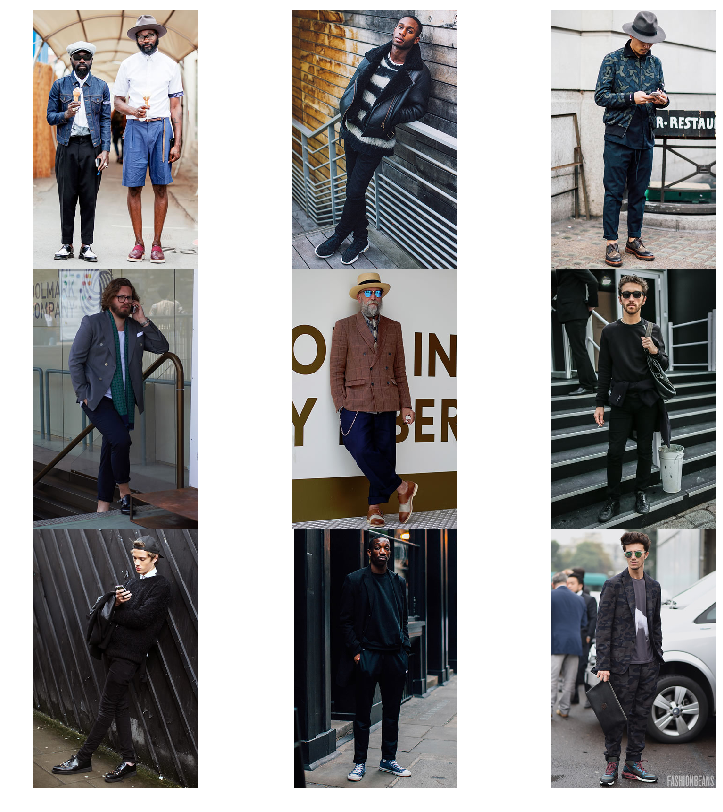

In [83]:
### Plotting the top n matches of the each item within it's row of cosine values

#n=number of items to test
n=1
#m=number of matches to present
m=9
for i in range(n):
    r=random.randrange(0,cos_val.shape[1]+1)
    
    print(list(cos_val.index.values)[r])
    cos_val_sort = cos_val.iloc[r,:].sort_values(ascending = False)
    
    fig5 = plt.figure(constrained_layout=True,figsize=(16, 16))
    spec5 = gridspec.GridSpec(ncols=3, nrows=1+m//3)
    spec5.update(wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 
    counter=1
    for row in range(1+m//3):
        for col in range(3):
            if counter < 1+m:
                ax = fig5.add_subplot(spec5[row, col])
                ax.imshow(mpimg.imread('/home/ec2-user/SageMaker/inspo-book/fashionbeans/processedimages/'+str(cos_val_sort.index[counter - 1]).split('-')[0]+'.jpg'))
                ax.axis('off')
                counter+=1